In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from dataclasses import dataclass
from sklearn.feature_selection import mutual_info_classif

In [ ]:
loan_apply = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thesis Data/loan_approval_dataset.csv')



In [ ]:
loan_apply.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:
loan_apply.shape

(4269, 13)

In [ ]:
loan_apply.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
loan_apply.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [ ]:
loan_apply.groupby(" loan_status")[" loan_amount"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Approved,2656.0,1.524725e+07,9.221696e+06,300000.0,7500000.0,14600000.0,22100000.0,39500000.0
Rejected,1613.0,1.494606e+07,8.741390e+06,300000.0,7900000.0,14500000.0,20800000.0,38200000.0


In [ ]:
#look at the data types for each variable in the df
loan_apply.dtypes

,0
loan_id,int64
no_of_dependents,int64
education,object
self_employed,object
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64


In [ ]:
loan_apply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
#Have a look for missing values
loan_apply.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [ ]:
#Plot the categorical variable and look at the distribution for each
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Exploratory Data Analysis (EDA)

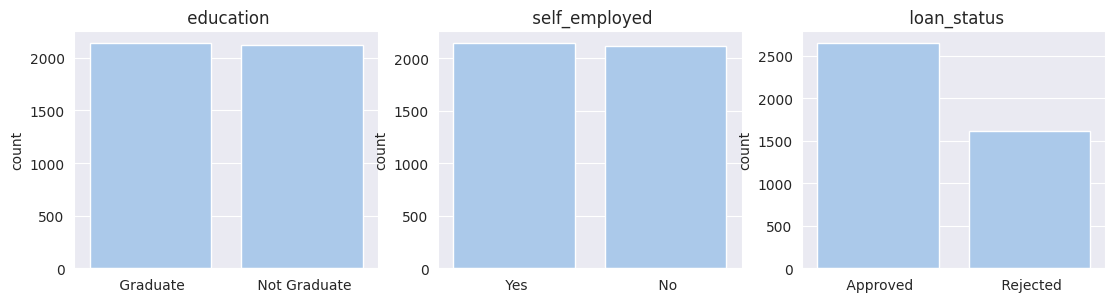

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and color palette for the plots
sns.set_style('darkgrid')
sns.set_palette('pastel')  # deep and tab10 are other options


#loan_apply = pd.DataFrame(data)

# Identify object columns
obj = (loan_apply.dtypes == 'object')
object_cols = list(obj[obj].index)

#Plotting
plt.figure(figsize=(18, 40))  # Adjust figure size as needed

for i, col in enumerate(object_cols, start=1):
    y = loan_apply[col].value_counts()
    plt.subplot(11, 4, i)
    #plt.xticks(rotation=90)
    #plt.subplots_adjust(hspace=0.6, wspace=0.25)
    sns.barplot(x=list(y.index), y=y).set_title(col)

plt.show()

<Axes: xlabel=' loan_status', ylabel='count'>

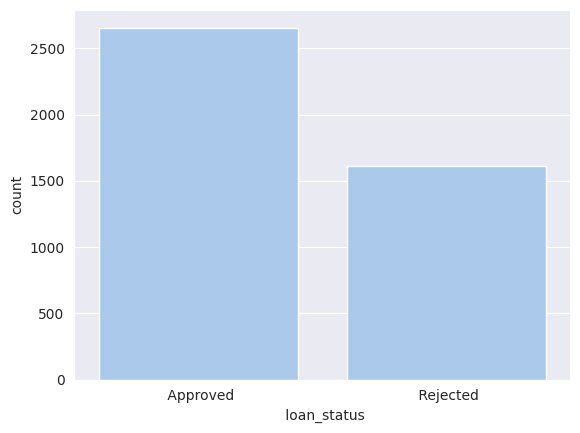

In [ ]:
sns.countplot(x=" loan_status",data=loan_apply)

In [ ]:
loan_apply[" loan_status"].value_counts()*100/len(loan_apply)

,count
loan_status,
Approved,62.215976
Rejected,37.784024


In [ ]:
#Convert target variable to 0 and 1
loan_apply[" loan_status"]=loan_apply[" loan_status"].apply(lambda x: 1 if x == "Approved" else 0)

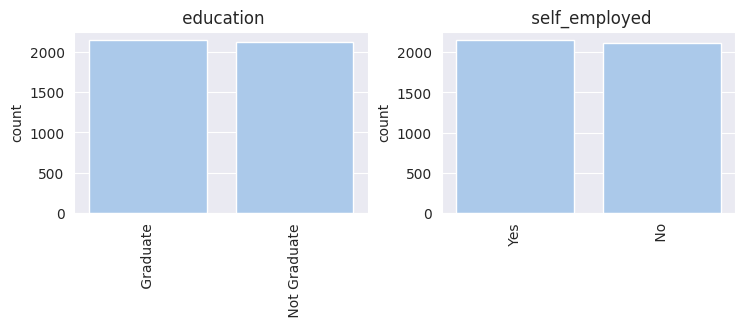

In [ ]:
#Plot the categorical variables to visualize the applicant distribution as well as see the class variable split.
sns.set_style('darkgrid')
sns.set_palette('pastel') #deep tab10

obj = (loan_apply.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,40))
index = 1

for col in object_cols:
    y = loan_apply[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace = 0.6, wspace=0.25)
    sns.barplot(x=list(y.index), y=y).set_title(col)
    index +=1


In [ ]:
print(loan_apply.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


<Axes: xlabel=' loan_term', ylabel='Count'>

<Figure size 600x2000 with 0 Axes>

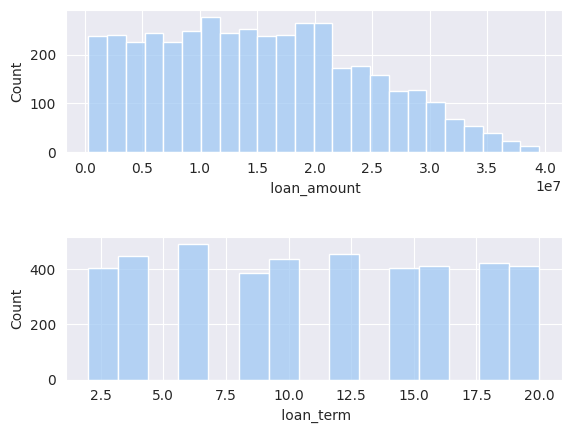

In [ ]:
#Plot a histogram for loan amount and loan term across the dataset
plt.figure(figsize=(6,20))
fig,axes = plt.subplots(2, 1, squeeze=False)

sns.histplot(loan_apply[' loan_amount'], ax=axes[0,0])
plt.subplots_adjust(hspace=0.6)
sns.histplot(loan_apply[' loan_term'], ax=axes[1,0])

<Axes: xlabel=' cibil_score', ylabel='Count'>

<Figure size 600x2000 with 0 Axes>

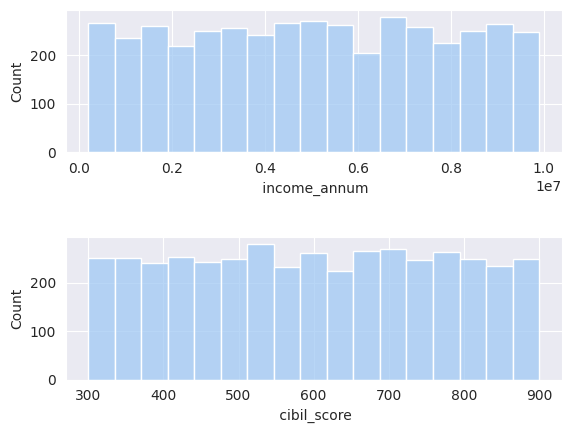

In [ ]:
#Plot the applicants income and credit score
plt.figure(figsize=(6,20))
fig,axes = plt.subplots(2, 1, squeeze=False)

sns.histplot(loan_apply[' income_annum'],ax=axes[0,0])
plt.subplots_adjust(hspace=0.6)
sns.histplot(loan_apply[' cibil_score'],ax=axes[1,0])

<Axes: xlabel=' bank_asset_value', ylabel='Count'>

<Figure size 800x1600 with 0 Axes>

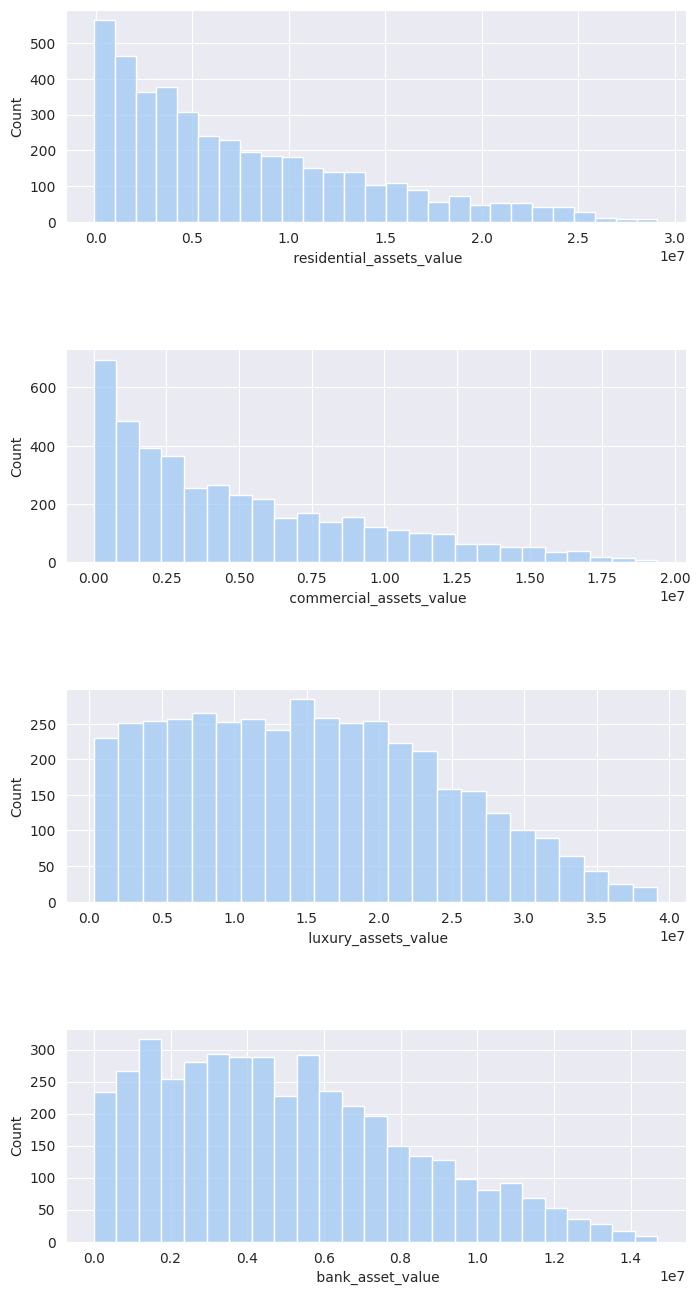

In [ ]:
#Plot a histogram for applicants assests values (Commercial, Residential and Luxury)
plt.figure(figsize=(8,16))
fig,axes = plt.subplots(4, 1, figsize=(8, 16), squeeze=False)

sns.histplot(loan_apply[' residential_assets_value'], ax=axes[0,0])
plt.subplots_adjust(hspace=0.6)
sns.histplot(loan_apply[' commercial_assets_value'], ax=axes[1,0])
sns.histplot(loan_apply[' luxury_assets_value'], ax=axes[2,0])
sns.histplot(loan_apply[' bank_asset_value'], ax=axes[3,0])

[Text(0.5, 1.0, 'loan_status based on Employment')]

<Figure size 1000x400 with 0 Axes>

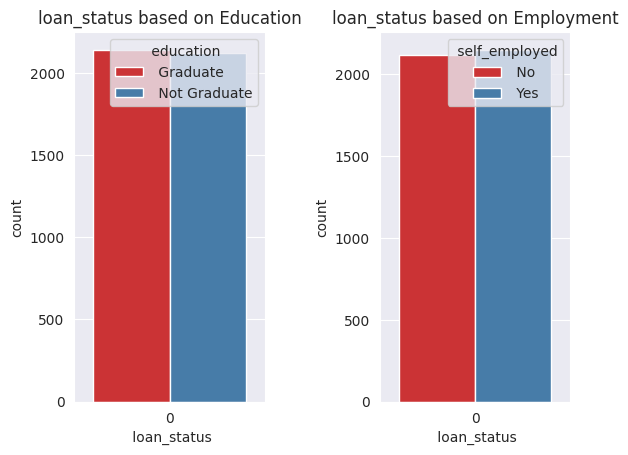

In [ ]:
#Loan application status based on education and employment status.
plt.figure(figsize=(10,4))

fig,axes = plt.subplots(1, 2, squeeze=False)

sns.countplot(ax=axes[0,0],x=' loan_status',hue=' education',data=loan_apply, palette='Set1').set(title="loan_status based on Education")
plt.subplots_adjust(wspace=0.6)
sns.countplot(ax=axes[0,1],x=' loan_status',hue=' self_employed',data=loan_apply, palette='Set1').set(title="loan_status based on Employment")

[Text(0.5, 1.0, 'loan_status based on Loan Term')]

<Figure size 1000x400 with 0 Axes>

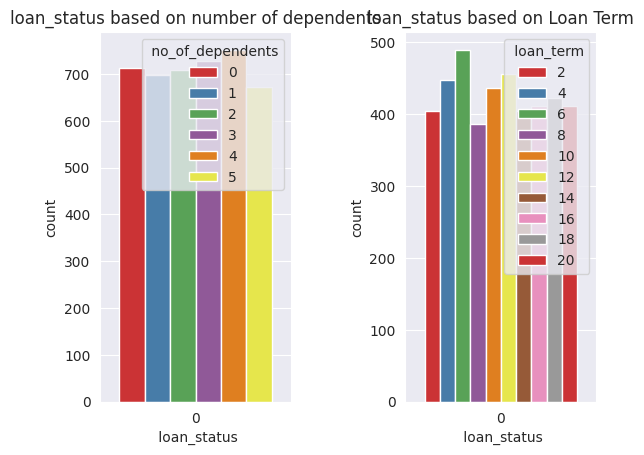

In [ ]:
#Loan application status based on loan term and loan amount.
plt.figure(figsize=(10,4))

fig,axes = plt.subplots(1, 2, squeeze=False)

sns.countplot(ax=axes[0,0],x=' loan_status',hue=' no_of_dependents',data=loan_apply, palette='Set1').set(title="loan_status based on number of dependents")
plt.subplots_adjust(wspace=0.6)
sns.countplot(ax=axes[0,1],x=' loan_status',hue=' loan_term',data=loan_apply, palette='Set1').set(title="loan_status based on Loan Term")

<Axes: xlabel=' loan_status', ylabel=' income_annum'>

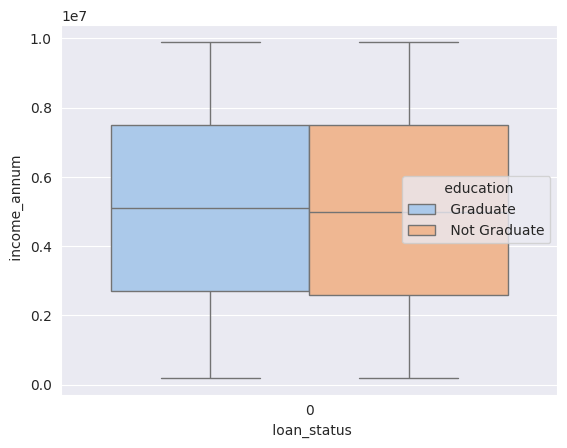

In [ ]:
#Boxplot to look at potential outliers of loan statuss against income and education
sns.boxplot(x=' loan_status',y=' income_annum',data=loan_apply,hue=' education')

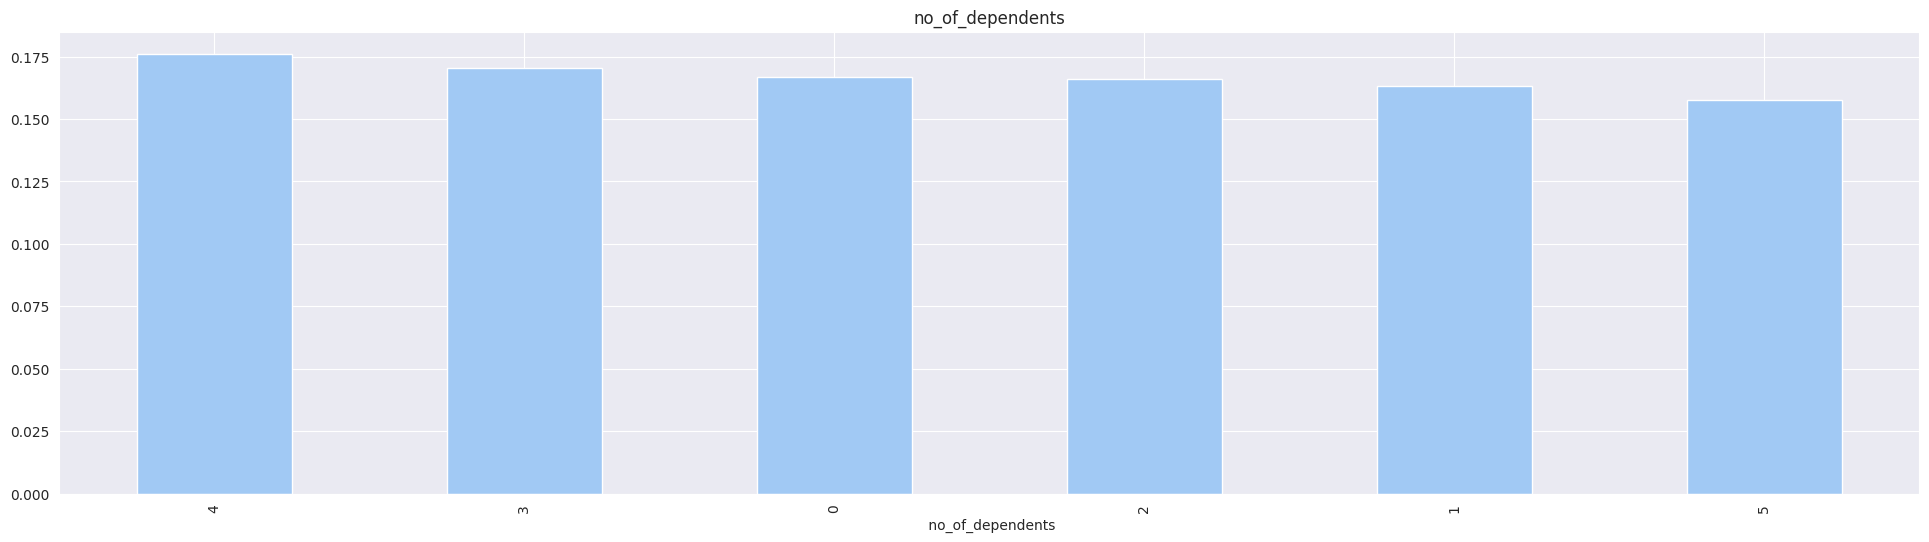

In [ ]:
#Independent ordinal variables
loan_apply[' no_of_dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= "no_of_dependents")
plt.show()

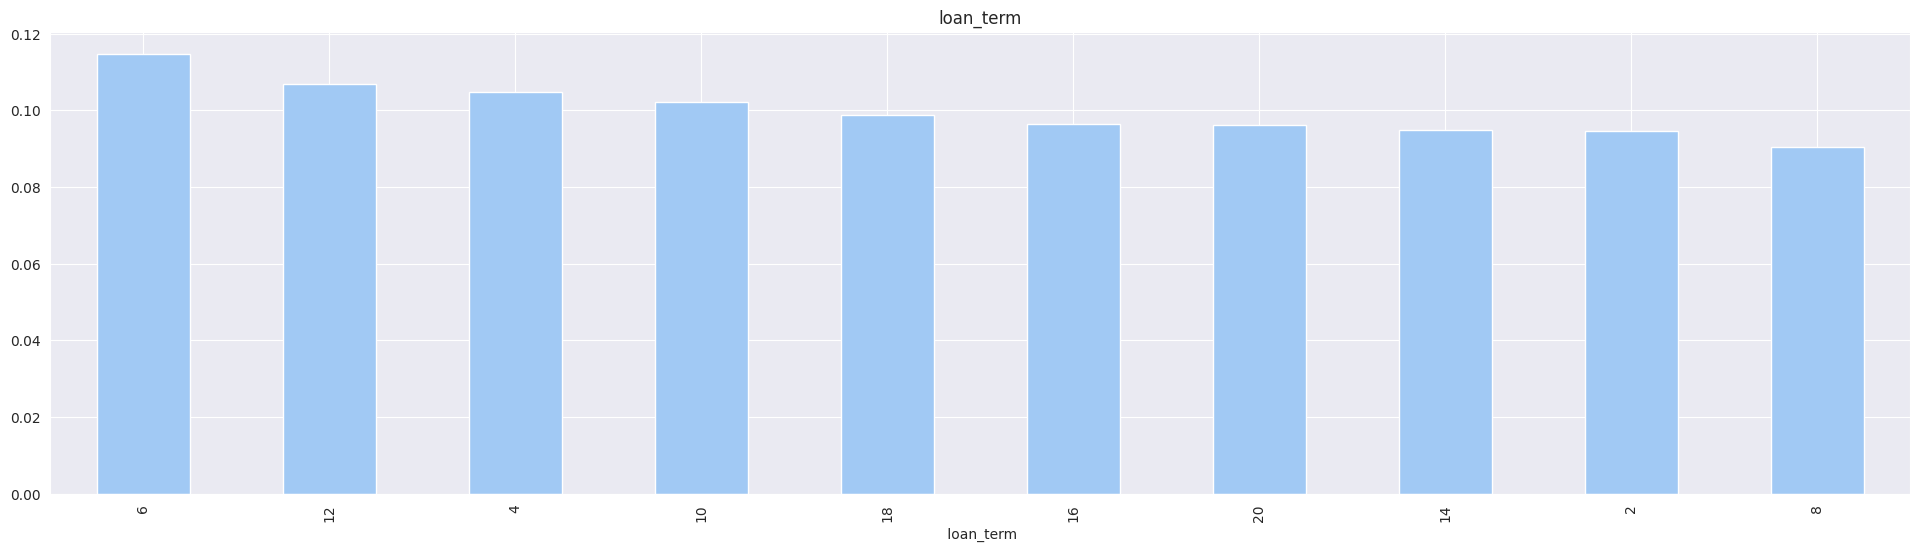

In [ ]:
#loan term
loan_apply[' loan_term'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= "loan_term")
plt.show()

<ipython-input-30-c7d1dc7c5dde>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_apply[' income_annum'])


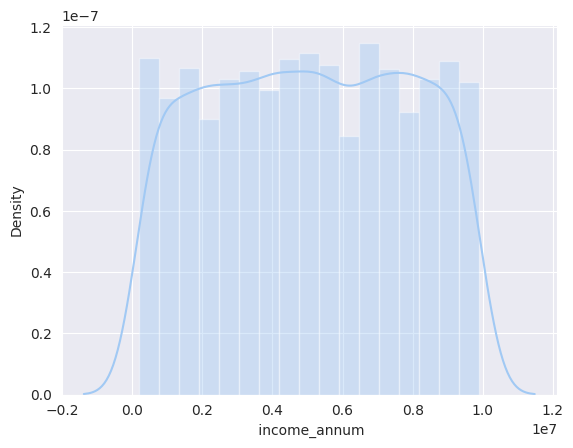

In [ ]:
sns.distplot(loan_apply[' income_annum'])
plt.show()
#loan_apply[' income_annum'].plot.box(figsize=(16,5))
#plt.show()

In [ ]:
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [ ]:
#Data Processing
from sklearn import preprocessing

In [ ]:
Cleaned_loan = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thesis Data/loan_approval_dataset.csv', skipinitialspace=True)


In [ ]:
#Remove the leading spaces from the variable
Cleaned_loan.columns = loan_apply.columns.str.lstrip()

In [ ]:
print(Cleaned_loan.columns)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')


In [ ]:
Cleaned_loan.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [ ]:
print(Cleaned_loan['loan_status'].unique())

[1 0]


In [ ]:
#have a look at the possible imbalance
Cleaned_loan['loan_status'].value_counts()

loan_status
1    2656
0    1613
Name: count, dtype: int64

In [ ]:
#Encode the Y variable (class)
Cleaned_loan.replace({"loan_status":{'Rejected':0,'Approved':1}},inplace=True)
#Cleaned_loan['loan_status'] = Cleaned_loan['loan_status'].map({'Rejected':0, 'Approved':1})

In [ ]:
#Encode for X variables education and self-employed
Cleaned_loan.replace({"education":{'Not Graduate':0,'Graduate':1}},inplace=True)
Cleaned_loan.replace({"self_employed":{'No':0,'Yes':1}},inplace=True)

In [ ]:
Cleaned_loan.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [ ]:
#Find all categorical variables
cat_var = (Cleaned_loan.dtypes == 'object')
print(cat_var)

loan_id                     False
no_of_dependents            False
education                   False
self_employed               False
income_annum                False
loan_amount                 False
loan_term                   False
cibil_score                 False
residential_assets_value    False
commercial_assets_value     False
luxury_assets_value         False
bank_asset_value            False
loan_status                 False
dtype: bool


In [ ]:
#Verify that the change was applied to categorical variables
#cat_var = (Cleaned_loan.dtypes == 'object')
#print(cat_var)

loan_id                     False
no_of_dependents            False
education                   False
self_employed               False
income_annum                False
loan_amount                 False
loan_term                   False
cibil_score                 False
residential_assets_value    False
commercial_assets_value     False
luxury_assets_value         False
bank_asset_value            False
loan_status                 False
dtype: bool


<Axes: >

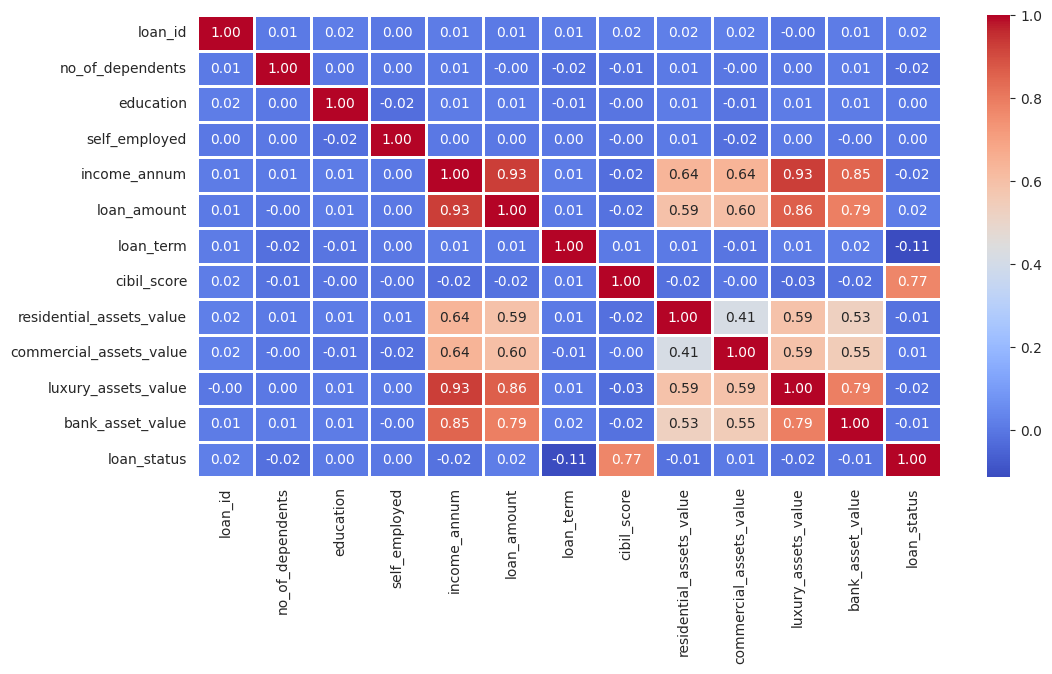

In [ ]:
#Corellation matrix by plotting a heat map.
plt.figure(figsize=(12,6))

sns.heatmap(Cleaned_loan.corr(),cmap='coolwarm',fmt='.2f',linewidths=2,annot=True)

In [ ]:
#Save the cleaned dataframe to a new CSV file to be used for modelling
Cleaned_loan.to_csv("Cleaned_loan.csv", index=False)

In [ ]:
#Drop the loan ID column
Cleaned_loan = Cleaned_loan.drop(columns=['loan_id'])

In [ ]:
Cleaned_loan.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [ ]:
Cleaned_loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   education                 4269 non-null   int64
 2   self_employed             4269 non-null   int64
 3   income_annum              4269 non-null   int64
 4   loan_amount               4269 non-null   int64
 5   loan_term                 4269 non-null   int64
 6   cibil_score               4269 non-null   int64
 7   residential_assets_value  4269 non-null   int64
 8   commercial_assets_value   4269 non-null   int64
 9   luxury_assets_value       4269 non-null   int64
 10  bank_asset_value          4269 non-null   int64
 11  loan_status               4269 non-null   int64
dtypes: int64(12)
memory usage: 400.3 KB


In [ ]:
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
#Use cleaned data to reserve 10% for deployment and the remaining 90% will be split into train/test

In [ ]:
#loan_clean = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Thesis Data/Cleaned data/loan_clean-2.csv')


In [ ]:
Cleaned_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   no_of_dependents          4269 non-null   int64
 1   education                 4269 non-null   int64
 2   self_employed             4269 non-null   int64
 3   income_annum              4269 non-null   int64
 4   loan_amount               4269 non-null   int64
 5   loan_term                 4269 non-null   int64
 6   cibil_score               4269 non-null   int64
 7   residential_assets_value  4269 non-null   int64
 8   commercial_assets_value   4269 non-null   int64
 9   luxury_assets_value       4269 non-null   int64
 10  bank_asset_value          4269 non-null   int64
 11  loan_status               4269 non-null   int64
dtypes: int64(12)
memory usage: 400.3 KB


In [ ]:
Cleaned_loan.shape

(4269, 12)

In [ ]:
#Reserve 10% of the data for model deployment testing
loan_clean_10_percent, loan_clean_remaining = train_test_split(Cleaned_loan, test_size=0.90, random_state=42)

In [ ]:
loan_clean_10_percent.shape

(426, 12)

In [ ]:
loan_clean_remaining.shape

(3843, 12)

In [ ]:
loan_clean_10_percent.to_csv('10_percent_loandata.csv', index=False)

In [ ]:
loan_clean_remaining.to_csv('remaining_loandata.csv', index=False)

In [ ]:
#Train the model with the training data from the remaining dataset
from sklearn.model_selection import train_test_split

x_status = loan_clean_remaining.drop(['loan_status'],axis=1)
y_status = loan_clean_remaining['loan_status']
x_status.shape,y_status.shape

x_train, x_test, y_train, y_test = train_test_split(x_status, y_status, test_size=0.3,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2690, 11), (1153, 11), (2690,), (1153,))

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression



In [ ]:
RF = RandomForestClassifier() #create a new random forest classifier
GMB = GradientBoostingClassifier() #initiate the ensemble Classifier
XGBoost = xgb.XGBClassifier() #initiate the ensemble Classifier
Log_reg = LogisticRegression() #create a logistic regression model
